## <center>This notebook demonstrates how to use the DSR class to generate and visualize neural spike trains. We show how to build a neuron with a DDM or an arbitrary firing rate using doubly stochastic renewal process, and how to generate spikes from that neuron. Finally, we estimate the spiking irregularity of neurons for which the ground truth is known.<center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from dsr_project import DSR, neuron_stat

### Here we create a DSR object (neuron). The object has two atributes 1- firing rate model and 2- renewal model. For this neuron, we assume the firing rate comes from drift-diffusion with sticky boundaries. We assume gamma renewal distribution and we choose the spiking irregularity to be sub-Poisson (0.3).

(20, 2000)

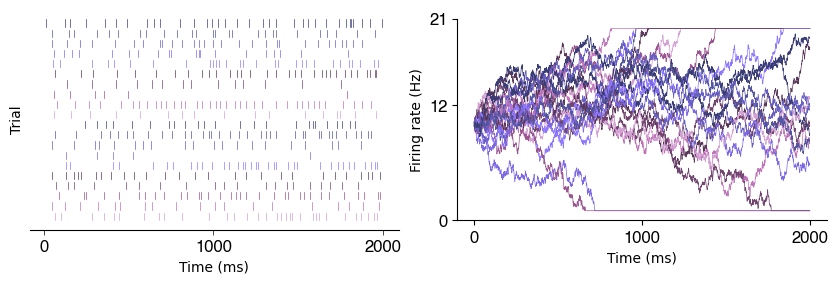

In [3]:
params = {'firing_model':{"model": "DDAB", "params": {"start" : 10.0, "Boundry_low" : 1.0, "Boundry_high" : 20, "Drift" : 0, "Diffusion" : 20 }},
           'renewal_model':{"model": "Gamma_generator", "params": {"phi":0.3}} }  
neuron = DSR(**params)
spike_times, spike = neuron.spike_generator(time=2000, num_trials=20)

neuron.show_spikes()
np.shape(spike)

### Here, we create a DSR object (neuron) with two attributes: 1) the firing rate model and 2) the renewal model. For this neuron, we assume the firing rate is generated from drift-diffusion with sticky boundaries. To compare it with the previous panels, we use the same firing rates generated in the previous panels by using 'Feed' as our firing rate model. Additionally, we assume a gamma renewal distribution, and we choose the spiking irregularity to be Poisson (1).

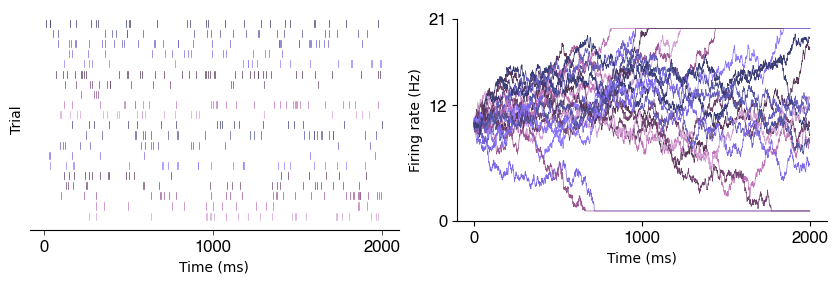

In [4]:
params = {'firing_model':{"model": "Feed", "params": {"Fr_array": neuron.rates}},
           'renewal_model':{"model": "Gamma_generator", "params": {"phi":1}} }  
neuron = DSR(**params)
spike_times, spike = neuron.spike_generator(time=2000, num_trials=20)

neuron.show_spikes()


### Here, we create a DSR object (neuron) with two attributes: 1) the firing rate model and 2) the renewal model. For this neuron, we assume the firing rate is generated from drift-diffusion with sticky boundaries. To compare it with the previous panels, we use the same firing rates generated in the previous panels by using 'Feed' as our firing rate model. Additionally, we assume a gamma renewal distribution, and we choose the spiking irregularity to be super-Poisson (1.7).

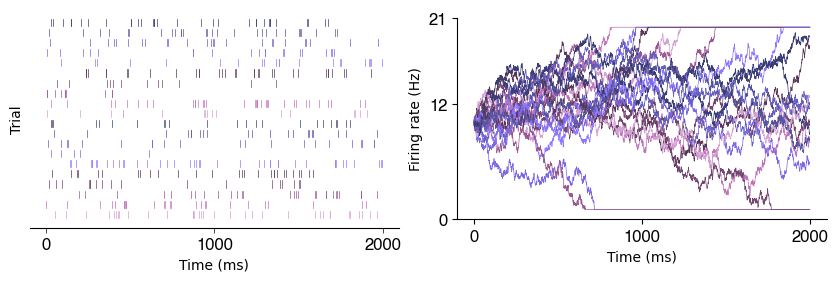

In [5]:
params = {'firing_model':{"model": "Feed", "params": {"Fr_array": neuron.rates}},
           'renewal_model':{"model": "Gamma_generator", "params": {"phi":1.7}} }  
neuron = DSR(**params)
spike_times, spike = neuron.spike_generator(time=2000, num_trials=20)

neuron.show_spikes()


### This example demonstrates how to estimate spiking irregularity using the estimation method.

In [10]:
params = {'firing_model':{"model": "DDAB", "params": {"start" : 30.0, "Boundry_low" : 20, "Boundry_high" : 30, "Drift" : 0, "Diffusion" : 20 }},
           'renewal_model':{"model": "Gamma_generator", "params": {"phi":0.5}} }  
neuron = DSR(**params)
spike_times, spike = neuron.spike_generator(time=2000, num_trials=20)


phi_result = neuron_stat.neuron_stats(
                    spike,
                    react_time=None,
                    waiting_time_cut=2000,
                    binsize=100,
                    shift=50
                )
phi_result 

np.float64(0.5002011570475273)

### To test the accuracy of the estimation method, we generate spikes from neurons with known ground truth spiking irregularity and then apply the method to estimate it.

2025-06-11 20:57:30,357 - INFO - Testing True_phi = 0.1
2025-06-11 20:57:34,641 - INFO - Testing True_phi = 0.2
2025-06-11 20:57:38,980 - INFO - Testing True_phi = 0.3
2025-06-11 20:57:43,422 - INFO - Testing True_phi = 0.4
2025-06-11 20:57:47,774 - INFO - Testing True_phi = 0.5
2025-06-11 20:57:52,163 - INFO - Testing True_phi = 0.6
2025-06-11 20:57:56,520 - INFO - Testing True_phi = 0.7
2025-06-11 20:58:00,877 - INFO - Testing True_phi = 0.8
2025-06-11 20:58:05,048 - INFO - Testing True_phi = 0.9


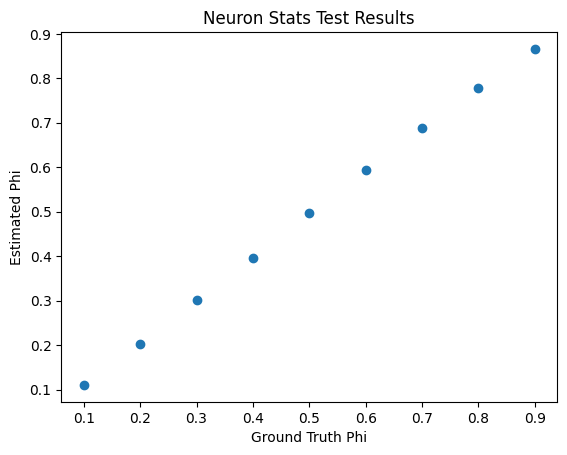

In [8]:
from test_neuron_stats import *

phi_values = np.arange(0.1, 1.0, 0.1)  

# Define DSR parameters
params_template = {'firing_model':{"model": "DDAB", "params": {"start" : 20.0, "Boundry_low" : 10, "Boundry_high" : 30, "Drift" : 0, "Diffusion" : 20 }},
           'renewal_model':{"model": "Gamma_generator", "params": {"phi":0.3}} }  


phis = test_neuron_stats(
    DSR=DSR, 
    params_template=params_template,
    phi_values=phi_values,
    n_iterations=100,
    time=2000,
    num_trials=100,
    waiting_time_cut=2000,
    binsize=100,
    shift=50)

# Visualize results
plt.plot(phi_values, np.nanmean(phis, axis=0), 'o')
plt.xlabel('Ground Truth Phi')
plt.ylabel('Estimated Phi')
plt.title('Neuron Stats Test Results')
plt.show()